In [2]:
import sys
sys.dont_write_bytecode = True
sys.path.append('../')
import json
from modules import dataFrame, dataHandler
import numpy as np
import scienceplots
import scipy.optimize as opt
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

datafolder_path = "../data"

prototype_lvdt_data= {
    'alu_magcore_d06_3mm_16layers': '/prototype/lvdt_alu_id10_od14_l12_magcore_d06_l10_32awg_16layers_3mmwidth.h5',
    'alu_magcore_d06_5mm_16layers': '/prototype/lvdt_alu_id10_od14_l12_magcore_d06_l10_32awg_16layers_5mmwidth.h5',

    }
prtotype_vc_data = {
    'alu_magcore_d06_3mm_16layers': '/prototype/vc_alu_id10_od14_l12_magcore_d06_l10_32awg_16layer_3mmwidth.h5',
    'alu_magcore_d06_5mm_16layers': '/prototype/vc_alu_id10_od14_l12_magcore_d06_l10_32awg_16layer_5mmwidth.h5',
    }

In [ ]:
lvdt_dataset = dataHandler.get_data_from_dict(datafolder_path=datafolder_path, data_dict=prototype_lvdt_data)
for key in lvdt_dataset:
    data = lvdt_dataset[key]
    # print(data.keys())
    plt.plot(data['CC_pos'], data['OC_upp_volt'], marker = 'o', label=key)
    plt.xlabel('CC position (mm)')
    plt.ylabel('MC voltage (V)')
    plt.legend()
    plt.show()

Optimal parameters: 14.63 V/mm
Optimal parameters: 40.79 V/mm


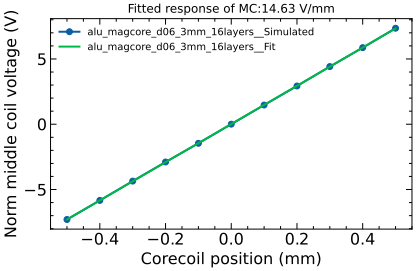

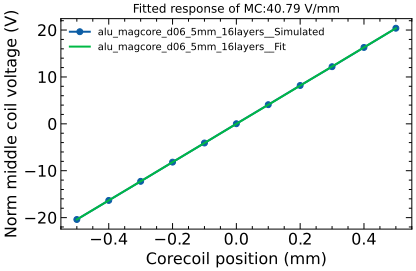

In [10]:
lvdt_dataset = dataHandler.get_data_from_dict(datafolder_path=datafolder_path, data_dict=prototype_lvdt_data)
for key in lvdt_dataset:
    data  = lvdt_dataset[key]
    norm_factor = 1
    Gain = 800
    def linfunc(x, a, b):
        return a*x + b
    if norm_factor != 1:
        data['MC_volt_abs'] = data['MC_volt_abs']/norm_factor
    plt.style.use(['science','no-latex','notebook'])
    popt, pcov = opt.curve_fit(linfunc, data['CC_pos'], data['MC_volt_abs'])
    fitted_data = linfunc(data['CC_pos'], *popt)
    print('Optimal parameters: ' f'{popt[0]*Gain:.2f} V/mm')
    plt.figure(figsize=(6,4))
    plt.plot(data['CC_pos'], data['MC_volt_abs']*Gain, 'o-', label=key + '__Simulated', )
    plt.plot(data['CC_pos'], fitted_data*Gain, label=key + '__Fit')
    plt.xlabel('Corecoil position (mm)')
    if norm_factor != 1:
        plt.ylabel('Norm middle coil voltage (V)')
        plt.title('Fitted response of MC:' f'{popt[0]*Gain:.2f} V/mm', fontsize = 12) 
    else:
        plt.ylabel('Norm middle coil voltage (V)')
        plt.title('Fitted response of MC:' f'{popt[0]*Gain:.2f} V/mm', fontsize = 12)
    # the response is the slope value with the unit V/mmA
    plt.legend(fontsize = 10)
    plt.tight_layout()

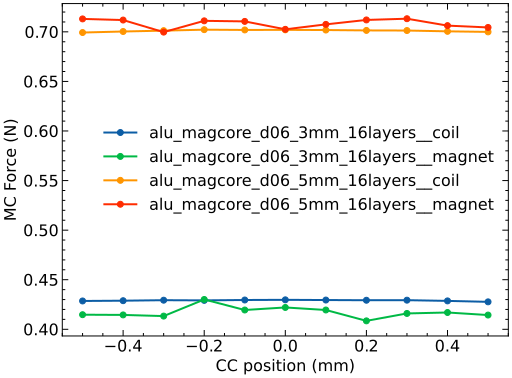

In [8]:
vc_dataset= dataHandler.get_data_from_dict(datafolder_path=datafolder_path, data_dict=prtotype_vc_data)
for key in vc_dataset:
    data = vc_dataset[key]
    plt.plot(data['CC_pos'], abs(data['OC_upp_force'] + data['OC_low_force']), marker = 'o', label=key + '__coil')
    plt.plot(data['CC_pos'], abs(data['M_force']), marker = 'o', label=key + '__magnet')
    plt.xlabel('CC position (mm)')
    plt.ylabel('MC Force (N)')
    plt.legend()
plt.show()